In [17]:
import os
os.chdir('/root/evaluate-saliency-4/jigsaw')

In [39]:

import benchmark.settings as settings
save_dir = 'results_vgg16_voc_2007_no_lr_scheduler2'
# im_id = 'bicycle000015'
im_id = 'dog000001'
# im_id = 'car000004'
save_dir = os.path.join(settings.RESULTS_DIR,save_dir)
im_save_dir = os.path.join(save_dir,im_id)

In [40]:
import pickle
with open(os.path.join(im_save_dir,'info.pkl'),'rb') as f:
    info = pickle.load(f)
info['OPTIONS'] = {}
info['OPTIONS']['span'] = 77
info['OPTIONS']['sigma'] = 61
info['OPTIONS']['non_lin'] = None
info['ref'] = torch.zeros((1,3,224,224)).to(device)

/root/evaluate-saliency-4/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


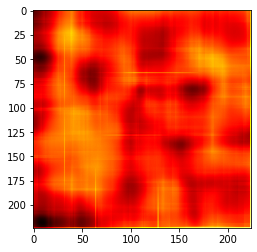

In [41]:

import torch
from cnn import denormalize_vgg
from jigsaw import place_patches_at_locations
from evaluate import realign_patch_centers_
from patch import extract_masked_patches,create_gaussian_masks
from model import get_patch_theta
from model import patch_centers_
from matplotlib import pyplot as plt
device = 'cpu'

def create_heat_map(ref,patch_theta0,importances_,span,sigma,device,non_lin,):
    grid_size = ref.shape[-2:]
    lim_mode = 'full'
    patch_theta = get_patch_theta(patch_theta0,grid_size,span,non_lin = non_lin,lim_mode=lim_mode)
    patch_centers = patch_centers_(patch_theta,grid_size,span)
    patch_masks = create_gaussian_masks(patch_centers,span,sigma,grid_size,device=device)
    patches = extract_masked_patches(ref,patch_masks,patch_centers,
    span)      
    #========================================================
    new_patch_centers = realign_patch_centers_(ref.shape[-2:],patches,patch_centers,span)
    importance_patches = [pm * pi for pm,pi in zip(patch_masks,importances_)]
    heat_map = place_patches_at_locations(ref.shape[-2:],importance_patches,new_patch_centers,span)
    # heat_map = place_patches_at_locations(ref.shape[-2:],patches,new_patch_centers,P.span)
    # heat_map_ = tensor_to_numpy(heat_map)[0,0]
    # return heat_map_
    return heat_map
#==================================================================================
heat_map = create_heat_map(torch.tensor(info['ref']).float().to(device),
                           torch.tensor(info['patch_theta0']).float().to(device),
                           info['importances'],info['OPTIONS']['span'],info['OPTIONS']['sigma'],device,info['OPTIONS']['non_lin'])
plt.figure()
plt.imshow(heat_map[0,0],cmap='hot')
plt.show()
#==================================================================================

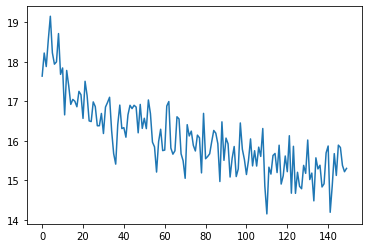

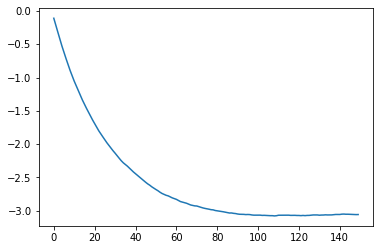

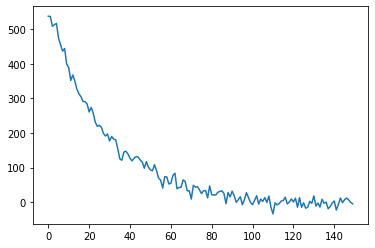

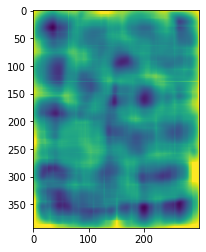

In [42]:
# info.keys()
for n in ['loss','avg_patch_importance','patch_importance_discrepancy_loss']:
    plt.figure()
    plt.plot(info['trends'][n])
    # plt.plot(info['trends']['patch_importance'])
    plt.show()

plt.figure()
plt.imshow(info['trends']['im_overlayed_importances'][0,0])
# plt.plot(info['trends']['patch_importance'])
plt.show()

